In [5]:
#upload document to google colab
from google.colab import files
uploaded = files.upload()

Saving 1996census.csv to 1996census.csv


In [0]:
#import libraries
import io
import pandas as pd
import io
data = io.BytesIO(uploaded['1996census.csv'])  
pddata = pd.read_csv(data) 

In [7]:
pddata.shape

(32560, 15)

In [0]:
#turn data into categorical so a decision tree can be used
data = pd.get_dummies(pddata,columns=['Worksource','occupation','marrital status','native country','race','sex','relationship'])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#turn to binary the target variable income
y = data[' <=50K']
y = [0 if x==' <=50K' else 1 for x in y]

In [0]:
#make the training data
x =  data.drop(columns=[' <=50K','Education'])

In [0]:
#train test splits
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=10)

In [0]:
#import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
randf = RandomForestClassifier(random_state=15)

In [0]:
#train the single decision classifier
decision =  DecisionTreeClassifier(max_leaf_nodes = 11, random_state=15)

In [16]:
decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [17]:
#train the random forest classifier
randf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [0]:
#predict the test data with the random forest
estimates = randf.predict(X_test)

In [0]:
#accuracy
from sklearn.metrics import accuracy_score

In [20]:
accuracy = accuracy_score(y_test,estimates)
accuracy 
#85% accuracy

0.8530405405405406

In [0]:
#import graphing libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#get the feature importances
feature_importances = pd.DataFrame(randf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [23]:
feature_importances['importance'][:10]
#top 10 features

final weight                           0.159906
Age                                    0.148081
Educatio n Number                      0.111632
hours per week                         0.084964
capital gain                           0.083251
relationship_ Husband                  0.081615
marrital status_ Married-civ-spouse    0.042952
capital loss                           0.030704
occupation_ Exec-managerial            0.030099
occupation_ Prof-specialty             0.017959
Name: importance, dtype: float64

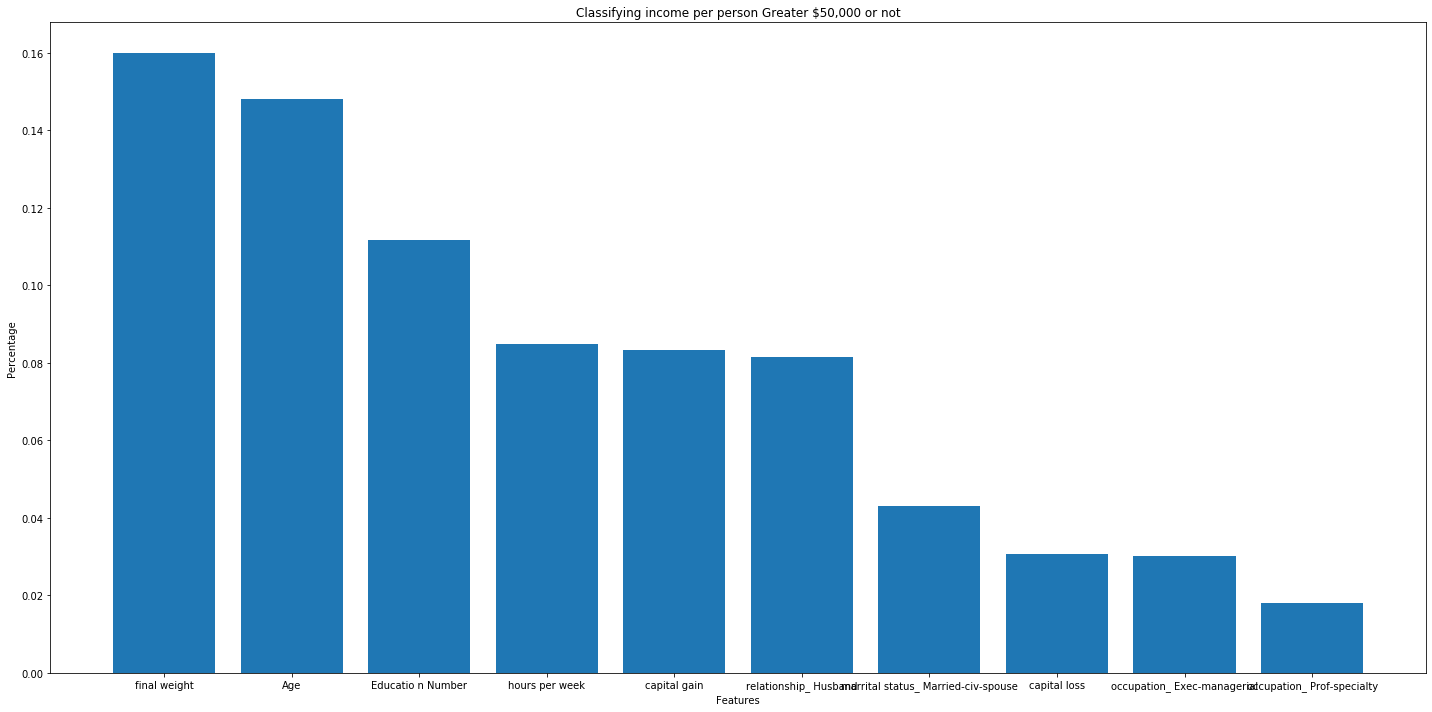

In [24]:
import numpy as np
y_pos = np.arange(len(feature_importances['importance'][:10])) 
#plt.bar(y_pos, feature_importances['importance'][:10], align='center', alpha=0.5)
#plt.xticks(y_pos, feature_importances.index[:10])
plt.figure(figsize=(20,10))
plt.bar(x=[x for x in range(10)],height=feature_importances['importance'][:10])
plt.xticks(range(10),feature_importances.index[:10])
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.title('Classifying income per person Greater $50,000 or not')
plt.tight_layout()
plt.savefig('chart.jpg')
#graph the most important features

In [0]:
from sklearn.tree.export import export_text

In [0]:
tree_rules = export_text(randf.estimators_[4])

In [27]:
tree_rules
#the text of the #4 tree from the random forest based on its rules from most important to least left to right

'|--- feature_86 <= 0.50\n|   |--- feature_32 <= 0.50\n|   |   |--- feature_19 <= 0.50\n|   |   |   |--- feature_0 <= 27.50\n|   |   |   |   |--- feature_43 <= 0.50\n|   |   |   |   |   |--- feature_2 <= 10.50\n|   |   |   |   |   |   |--- feature_5 <= 49.50\n|   |   |   |   |   |   |   |--- feature_50 <= 0.50\n|   |   |   |   |   |   |   |   |--- feature_35 <= 0.50\n|   |   |   |   |   |   |   |   |   |--- feature_85 <= 0.50\n|   |   |   |   |   |   |   |   |   |   |--- feature_16 <= 0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6\n|   |   |   |   |   |   |   |   |   |   |--- feature_16 >  0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0\n|   |   |   |   |   |   |   |   |   |--- feature_85 >  0.50\n|   |   |   |   |   |   |   |   |   |   |--- feature_22 <= 0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11\n|   |   |   |   |   |   |   |   |   |   |--- feature_22 >  0.50\n|   |   |   |   |   |   |   | 

In [0]:
import graphviz
#library for graphing trees

In [0]:
from sklearn import tree
import pydotplus
#library for turning dot files (tree files) into graphs

In [0]:
dot=tree.export_graphviz(decision,feature_names=X_train.columns,filled=True,rounded=True)
#make the dot file

In [0]:
graph = pydotplus.graph_from_dot_data(dot)
#make the graph from the dot file

In [32]:
graph.write_jpeg('decision.jpeg')
#make the graph into a jpeg

True

Conclusion:
My findings are that the most important features to a business trying to find customers who make more than $50,000 per year to look at the age, education, and marrital status. These are the easiest things to find out about people and they are all near the top of the most important features.

I would also look at factors like location,and other demographic data as these account for the top feature which is a "demographic" numerical score based on the demographics. 